In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
from numpy import true_divide
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from sklearn.neighbors import KDTree
import glob

/home/mjancic/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
plt.rcParams.update({
    "mathtext.fontset": "cm",
    "font.family": "STIXGeneral",
    "text.usetex": False,
    "axes.formatter.use_mathtext": True,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.labelsize": 14
})

In [3]:
mit_files = glob.glob("../data/jarjar/results_jarjar_*.h5")
pfic_files = glob.glob("../data/timed_fvm/Eqx2D_Om0p18_*")

In [4]:
mit_data = []
for file in mit_files:
    with h5.File(file, 'r') as data:
        conf = data['conf']
        dendrite_h = conf.attrs.get('domain.dendrite.h')
        groups = list(data.keys())
        for group in groups:
            try:
                exec_time = data['{}/timer'.format(group)].attrs.get('total')
            except:
                exec_time = None
            
            if exec_time is not None:
                mit_data.append({'h':dendrite_h, 't':exec_time})
            

In [5]:
 def tail(f, lines=4):
    total_lines_wanted = lines

    BLOCK_SIZE = 1024
    f.seek(0, 2)
    block_end_byte = f.tell()
    lines_to_go = total_lines_wanted
    block_number = -1
    blocks = []
    while lines_to_go > 0 and block_end_byte > 0:
        if (block_end_byte - BLOCK_SIZE > 0):
            f.seek(block_number*BLOCK_SIZE, 2)
            blocks.append(f.read(BLOCK_SIZE))
        else:
            f.seek(0,0)
            blocks.append(f.read(block_end_byte))
        lines_found = blocks[-1].count(b'\n')
        lines_to_go -= lines_found
        block_end_byte -= BLOCK_SIZE
        block_number -= 1
    all_read_text = b''.join(reversed(blocks))
    return b'\n'.join(all_read_text.splitlines()[-total_lines_wanted:])

In [6]:
pfic_data = []
for file in pfic_files:
     f =  open(file, 'rb')

     lines = tail(f).decode("utf-8")
     time = float(lines.split(" ")[-8])
     h = float(file.split("_m")[-1].split(".log")[0])

     pfic_data.append({'h':h, 't':time})


MIT:
Pfic:


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


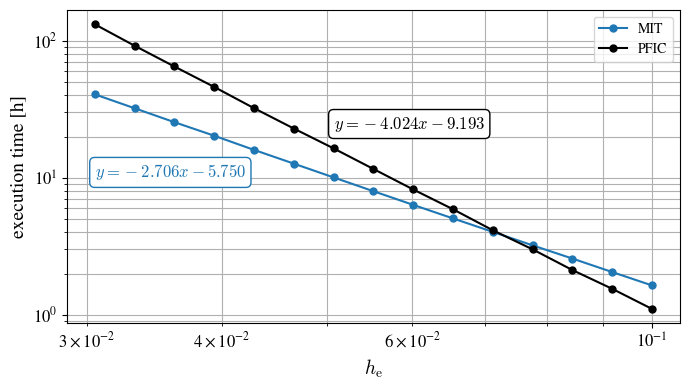

In [8]:
fig, ax = plt.subplots(1,1, figsize=(7, 4))
props_o = dict(boxstyle='round', facecolor='white', alpha=1, edgecolor='k')
props_b = dict(boxstyle='round', facecolor='white', alpha=1, edgecolor='tab:blue')

hs = [d['h'] for d in mit_data]
ts = [d['t'] / 3600 for d in mit_data]
hs, ts = zip(*sorted(zip(hs, ts)))

print("MIT:")
# print("h:", hs)
# print("time:", ts)
ax.semilogy(hs, ts, '.-', label="MIT", ms=10)

k,n = np.polyfit(np.log(hs), np.log(ts),1)
# plt.plot(hs,  np.multiply(np.exp(n), np.power(hs, k)), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker
ax.text(x=hs[0], y=ts[6], s="$y={:.3f}x{:.3f}$".format(k, n), c="tab:blue", fontsize='large',  backgroundcolor="white", bbox=props_b)

hs = [d['h'] for d in pfic_data]
ts = [d['t'] / 3600 for d in pfic_data]
hs, ts = zip(*sorted(zip(hs, ts)))

print("Pfic:")
# print("h:", hs)
# print("time:", ts)

ax.loglog(hs, ts, '.-k', label="PFIC", ms=10)

k,n = np.polyfit(np.log(hs), np.log(ts),1)
# plt.plot(hs,  np.multiply(np.exp(n), np.power(hs, k)), '-.k') #'--k'=black dashed line, 'yo' = yellow circle marker
ax.text(x=hs[6], y=ts[5], s="$y={:.3f}x{:.3f}$".format(k, n), c="k", fontsize='large', backgroundcolor="white", bbox=props_o)




# ax.invert_xaxis()
ax.grid(True, 'both')
ax.set_xlabel("$h_\mathrm{e}$")
ax.set_ylabel("execution time [h]")
ax.legend()
fig.tight_layout()

if 1:
    fig.savefig('../manuscript/paper/figures/execution_times.eps', dpi=300, transparent=False, bbox_inches='tight')